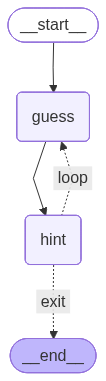

Attempt 1: Guess was 9, hint: higher
Attempt 2: Guess was 16, hint: higher
Attempt 3: Guess was 19, hint: lower
Attempt 4: Guess was 18, hint: lower
Guessed correctly in 5 attempts! The number was 17.


{'player_name': 'Student',
 'guesses': [9, 16, 19, 18, 17],
 'attempts': 5,
 'lower_bound': 17,
 'upper_bound': 17,
 'target': 17,
 'last_hint': 'correct'}

In [1]:
from langgraph.graph import END, StateGraph
from typing import TypedDict, List
import random

class GameState(TypedDict):
    player_name: str
    guesses: List[int]
    attempts: int
    lower_bound: int
    upper_bound: int
    target: int  # The number to guess
    last_hint: str  # "higher", "lower", or "correct"

def guess_node(state: GameState) -> GameState:
    guess = random.randint(state['lower_bound'], state['upper_bound'])
    state['guesses'].append(guess)
    state['attempts'] += 1
    return state

def hint_node(state: GameState) -> GameState:
    guess = state['guesses'][-1]
    if guess < state['target']:
        state['last_hint'] = "higher"
        state['lower_bound'] = max(state['lower_bound'], guess + 1)
    elif guess > state['target']:
        state['last_hint'] = "lower"
        state['upper_bound'] = min(state['upper_bound'], guess - 1)
    else:
        state['last_hint'] = "correct"
    return state

def should_continue(state: GameState):
    if state['last_hint'] == "correct":
        print(f"Guessed correctly in {state['attempts']} attempts! The number was {state['target']}.")
        return "exit"
    elif state['attempts'] >= 7:
        print(f"Max attempts reached. The number was {state['target']}.")
        return "exit"
    else:
        print(f"Attempt {state['attempts']}: Guess was {state['guesses'][-1]}, hint: {state['last_hint']}")
        return "loop"

graph = StateGraph(GameState)
graph.add_node("guess", guess_node)
graph.add_node("hint", hint_node)
graph.add_edge("guess", "hint")
graph.add_conditional_edges(
    "hint",
    should_continue,
    {
        "loop": "guess",
        "exit": END
    }
)
graph.set_entry_point("guess")
app = graph.compile()


from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))

# Example run:
target_number = random.randint(1, 20)
initial_state = {
    "player_name": "Student",
    "guesses": [],
    "attempts": 0,
    "lower_bound": 1,
    "upper_bound": 20,
    "target": target_number,
    "last_hint": ""
}
app.invoke(initial_state)